# _Coursera capstone project_

## The battle of neighbourhood

### Libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


In [3]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.19.0               |             py_0          53 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.19.0-py_0       conda-forge

The following packages will be UPDATED:

   

In [4]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         560 KB

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge


altair-2.2.2         | 462 KB    | #############################

In [5]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


## Coursera Capstone - REPORT
### Content
### Introduction Section :

1.1 Discussion of the "backgroung situation" leading to the problem at hand:

1.2 Problem to be resolved

1.3 Audience for this project.

### Data Section:

2.1 Data of Current Situation (current residence place)

2.2 Data required to resolve the problem

2.3 Data sources and data manipulation

### Methodology section :

3.1 Process steps and strategy to resolve the problem

3.2 Data Science Methods, machine learing, mapping tools and exploratory data analysis.

### Results section

Discussion of the results and how they help to take a decision.

### Discussion section

Elaboration and discussion on any observations and/or recommendations for improvement.

### Conclusion section

Desicison taken and Report Conclusion

## 1. Introduction Section :
### Discussion of the business problem and the audience who would be interested in this project.
### 1.1 Scenario and Background
I am a data scientist currently residing in Singapore. I currently live within walking distance to Downtown "Telok Ayer MRT metro station" therefore I have access to good public transportation to work. Likewise, I enjoy many ammenities in the neighborhood , such as international cousine restaurants, cafes, food shops and entertainment. I have been offered a great opportunity to work in Manhattan, NY. Although, I am very excited about it, I am a bit stress toward the process to secure a comparable place to live in Manhattan. Therefore, I decided to apply the learned skills during the Coursera course to explore ways to make sure my decision is factual and rewarding. Of course, there are alternatives to achieve the answer using available Google and Social media tools, but it rewarding doing it myself with learned tools.

### 1.2 Problem to be resolved:
The challenge to resolve is being able to find a rental apartment unit in Manhattan NY that offers similar characteristics and benefits to my current situation. Therefore, in order to set a basis for comparison, I want to find a renta unit subject to the following conditions:

Apartment with min 2 bedrooms with monthly rent not to exceed US$7000/month
Unit located within walking distance (<=1.0 mile, 1.6 km) from a subway metro station in Manhattan
Area with ammenities and venues similar to the ones described for current location ( See item 2.1)

### 1.3 Interested Audience
I believe this is a relevant project for a person or entity considering moving to a major city in Europe, US or Asia, since the approach and methodologies used here are applicable in all cases. The use of FourSquare data and mapping techniques combined with data analysis will help resolve the key questions arisen. Lastly, this project is a good practical case toward the development of Data Science skills.

## 2. Data Section:
### Description of the data and its sources that will be used to solve the problem
### 2.1 Data of Current Situation
I Currently reside in the neighborhood of 'Mccallum Street' in Downtonw Singapore. I use Foursquare to identify the venues around the area of residence which are then shown in the Singapore map shown in methodology and execution in section 3.0 . It serves as a reference for comparison with the desired future location in Manhattan NY

### 2.2 Data Required to resolve the problem
In order to make a good choice of a similar apartment in Manhattan NY, the following data is required: List/Information on neighborhoods form Manhattan with their Geodata ( latitud and longitud. List/Information about the subway metro stations in Manhattan with geodata. Listed apartments for rent in Manhattan area with descriptions ( how many beds, price, location, address) Venues and ammenities in the Manhattan neighborhoods (e.g. top 10) 2.3 sources and manipulation The list of Manhattan neighborhoods is worked out during LAb exercise during the course. A csv file was created which will be read in order to create a dataframe and its mapping. The csv file 'mh_neigh_data.csv' has the following below data structure. The file will be directly read to the Jupiter Notebook for convenience and space savings. The clustering of neighborhoods and mapping will be shown however. An algorythm was used to determine the geodata from Nominatim . The actual algorythm coding may be shown in 'markdown' mode becasues it takes time to run.

mh_neigh_data.tail():

          Borough    Neighborhood    Latitude    Longitude

      35    Manhattan    Turtle Bay    40.752042    -73.967708

      36    Manhattan    Tudor City    40.746917    -73.971219

      37    Manhattan    Stuyvesant Town    40.731000    -73.974052

      38    Manhattan    Flatiron    40.739673    -73.990947

      39    Manhattan    Hudson Yards    40.756658    -74.000111
      

A list of Manhattan subway metro stops was complied in Numbers (Apple excel) and it was complemeted with wikipedia data ( https://en.wikipedia.org/wiki/List_of_New_York_City_Subway_stations_in_Manhattan) and information from NY Transit authority and Google maps (https://www.google.com/maps/search/manhattan+subway+metro+stations/@40.7837297,-74.1033043,11z/data=!3m1!4b1) for a final consolidated list of subway stops names and their address. The geolocation was obtained via an algorythm using Nominatim. Details will be shown in the execution of methodolody in section 3.0. The subway csv file is ''MH_subway.csv'" and the data structure is: mhsub.tail(): sub_station sub_address lat long

17    190 Street Subway Station    Bennett Ave, New York, NY 10040, USA    40.858113    -73.932983

  18    59 St-Lexington Av Station    E 60th St, New York, NY 10065, USA        40.762259    -73.966271

  19    57 Street Station    New York, NY 10019, United States                40.764250    -73.954525

  20    14 Street / 8 Av    New York, NY 10014, United States                40.730862    -73.987156

  21    MTA New York City    525 11th Ave, New York, NY 10018, USA            40.759809    -73.999282
A list of places for rent was collected by web-browsing real estate companies in Manhattan : http://www.rentmanhattan.com/index.cfm?page=search&state=results https://www.nestpick.com/search?city=new-york&page=1&order=relevance&district=manhattan&gclid=CjwKCAiAjNjgBRAgEiwAGLlf2hkP3A-cPxjZYkURqQEswQK2jKQEpv_MvKcrIhRWRzNkc_r-fGi0lxoCA7cQAvD_BwE&type=apartment&display=list https://www.realtor.com/apartments/Manhattan_NY A csv file was compiled with the rental place that indicated: areas of Manhattan, address, number of beds, area and monthly rental price. The csv file "nnnn.csv" had the following below structure. An algorythm was used to create all the geodata using Nominatim, as shown in section 3.0. The actual algorythm coding may be shown in 'markdown' mode becasues it takes time to run. With the use of geolocator = Nominatim() , it was possible to determine the latitude and longiude for the subway metro locations as well as for the geodata for each rental place listed. The loop algorythms used are shown in the execution of data in section 3.0 "Great_circle" function from geolocator was used to calculate distances between two points , as in the case to calculate average rent price for units around each subway station and at 1.6 km radius. Foursquare is used to find the avenues at Manhattan neighborhoods in general and a cluster is created to later be able to search for the venues depending of the location shown.

### 2.4 How the data will be used to solve the problem¶
The data will be used as follows: Use Foursquare and geopy data to map top 10 venues for all Manhattan neighborhoods and clustered in groups ( as per Course LAB) Use foursquare and geopy data to map the location of subway metro stations , separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations. create a map that depicts, for instance, the average rental price per square ft, around a radious of 1.0 mile (1.6 km) around each subway station - or a similar metrics. I will be able to quickly point to the popups to know the relative price per subway area. Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim. Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government agencies such as Metro New York MTA, etc.

### 2.5 Mapping of Data
The following maps were created to facilitate the analysis and the choice of the palace to live. Manhattan map of Neighborhoods manhattan subway metro locations Manhattan map of places for rent Manhattan map of clustered venues and neighborhoods Combined maps of Manhattan rent places with subway locations Combined maps of Manhattan rent places with subway locations and venues clusters

## 3. Methodology section:
This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps.

The analysis and the stragegy:
The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of at least two candidate places for rent. The choice is made based on the demands imposed : location near a subway, rental price and similar venues to Singapore. This visual approach and maps with popups labels allow quick identification of location, price and feature, thus making the selection very easy.

The procesing of these DATA and its mapping will allow to answer the key questions to make a decision:

what is the cost of available rental places that meet the demands?
what is the cost of rent around a mile radius from each subway metro station?
what is the area of Manhattan with best rental pricing that meets criteria established?
What is the distance from work place ( Park Ave and 53 rd St) and the tentative future rental home?
What are the venues of the two best places to live? How the prices compare?
How venues distribute among Manhattan neighborhoods and around metro stations?
Are there tradeoffs between size and price and location?
Any other interesting statistical data findings of the real estate and overall data.

## METHODOLOY EXECUTION - Mapping Data
Singapore Map - Current residence and venues in neighborhood
for comparison to future Manhattan renting place

In [6]:
# Shenton Way, District 01, Singapore
address = 'Mccallum Street, Singapore'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore home are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Singapore home are 1.2792423, 103.8481312.


In [7]:
neighborhood_latitude=1.2792655
neighborhood_longitude=103.8480938

In [8]:
## here I will give my foursquare credentials which I will be removing as this project will be shared
CLIENT_ID = 
CLIENT_SECRET = 
VERSION = '20190101'

In [9]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=1PAW2GMP1JZKMCDPLHE1WS3BNLXK35LZ0BZHWCMS2TUCKV2K&client_secret=Y42RIHLGEUWUR43UBNE34LFG1SFB5WP552ZJNDKK3P0SYTAZ&v=20190101&ll=1.2792655,103.8480938&radius=500&limit=100'

In [11]:
# results display is hidden for report simplification 
results = requests.get(url).json()
#results

In [12]:
print(results)

{'meta': {'requestId': '5cdfe616f594df57ed92936e', 'code': 200}, 'response': {'suggestedBounds': {'sw': {'lat': 1.2747654954999954, 'lng': 103.84360107773058}, 'ne': {'lat': 1.2837655045000045, 'lng': 103.85258652226942}}, 'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'key': 'openNow', 'name': 'Open now'}]}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'venue': {'id': '51b49e49abd88dd0b4e7330f', 'categories': [{'id': '4bf58dd8d48988d123941735', 'pluralName': 'Wine Bars', 'icon': {'suffix': '.png', 'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/winery_'}, 'name': 'Wine Bar', 'shortName': 'Wine Bar', 'primary': True}], 'name': 'Napoleon Food & Wine Bar', 'photos': {'groups': [], 'count': 0}, 'location': {'lat': 1.2799249387439204, 'address': '206 Telok Ayer Street', 'labeledLatLngs': [{'lat': 1.2799249387439204, 'label': 'display', 'lng': 103.84733300574288}], 'country': 'Singapore', 'lng': 103.84733300574288, 'cc': 'SG', 'postalCode':

In [14]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
##print(categories_list)

In [15]:
venues = results['response']['groups'][0]['items']
SGnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
SGnearby_venues =SGnearby_venues.loc[:, filtered_columns]
# filter the category for each row
SGnearby_venues['venue.categories'] = SGnearby_venues.apply(get_category_type, axis=1)
# clean columns
SGnearby_venues.columns = [col.split(".")[-1] for col in SGnearby_venues.columns]

SGnearby_venues.shape

(100, 4)

In [16]:
# Venues near current Singapore residence place
SGnearby_venues.head(10)

,name,categories,lat,lng
0,Napoleon Food & Wine Bar,Wine Bar,1.279925,103.847333
1,Native,Cocktail Bar,1.280135,103.846844
2,Freehouse,Beer Garden,1.281254,103.848513
3,Park Bench Deli,Deli / Bodega,1.279872,103.847287
4,Pepper Bowl,Asian Restaurant,1.279371,103.846710
5,Coffee Break,Coffee Shop,1.279529,103.846695
6,Nouri,Modern European Restaurant,1.280267,103.846750
7,Mellower Coffee,Café,1.277814,103.848188
8,Muchachos,Burrito Place,1.279072,103.847026
9,Oven & Fried Chicken,Korean Restaurant,1.280479,103.847522


## Map of Singapore residence place with venues in Neighborhood - for reference

In [17]:
latitude=1.2792655
longitude=103.8480938
# create map of Singapore place  using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(SGnearby_venues['lat'], SGnearby_venues['lng'], SGnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_sg)  
    
map_sg

## MANHATTAN NEIGHBORHOODS - DATA AND MAPPING

In [18]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [19]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [20]:
neighborhoods_data = newyork_data['features']

In [21]:
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [22]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [23]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [24]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [25]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [26]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [27]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [28]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


In [29]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [30]:
# here I will be removing my foursquare credentials as this will be shared in public
CLIENT_ID = 
CLIENT_SECRET = 
VERSION = '20190101' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1PAW2GMP1JZKMCDPLHE1WS3BNLXK35LZ0BZHWCMS2TUCKV2K
CLIENT_SECRET:Y42RIHLGEUWUR43UBNE34LFG1SFB5WP552ZJNDKK3P0SYTAZ


In [31]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [32]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [33]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=1PAW2GMP1JZKMCDPLHE1WS3BNLXK35LZ0BZHWCMS2TUCKV2K&client_secret=Y42RIHLGEUWUR43UBNE34LFG1SFB5WP552ZJNDKK3P0SYTAZ&v=20190101&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

In [34]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cdfe6584434b9217e1b9ec9'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b4429abf964a52037f225e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1ca941735',
         'name': 'Pizza Place',
         'pluralName': 'Pizza Places',
         'primary': True,
         'shortName': 'Pizza'}],
       'delivery': {'id': '72548',
        'provider': {'icon': {'name': '/delivery_provider_seamless_20180129.png',
          'prefix': 'https://fastly.4sqi.net/img/general/cap/',
          'sizes': [40, 50]},
         'name': 'seamless'},
        'url': 'https://www.seamless.com/menu/arturos-pizza-5189-broadway-ave-new-york/72548?affiliate=1131&utm_source=foursquare-affiliat

In [35]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [36]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Dunkin',Donut Shop,40.877136,-73.906666
4,Starbucks,Coffee Shop,40.877531,-73.905582


In [37]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [39]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [40]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3325, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [41]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,100,100,100,100,100,100
Carnegie Hill,100,100,100,100,100,100
Central Harlem,46,46,46,46,46,46
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,47,47,47,47,47,47
East Village,100,100,100,100,100,100


In [42]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shop

In [43]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shop

In [44]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
         venue  freq
0         Park  0.08
1  Coffee Shop  0.07
2        Hotel  0.05
3          Gym  0.04
4    Wine Shop  0.03


----Carnegie Hill----
         venue  freq
0  Pizza Place  0.06
1  Coffee Shop  0.05
2         Café  0.04
3  Yoga Studio  0.03
4          Spa  0.03


----Central Harlem----
                venue  freq
0  Chinese Restaurant  0.07
1  African Restaurant  0.07
2      Cosmetics Shop  0.04
3          Public Art  0.04
4  Seafood Restaurant  0.04


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1      Ice Cream Shop  0.05
2  Italian Restaurant  0.05
3              Bakery  0.04
4           Nightclub  0.04


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.10
1    American Restaurant  0.04
2           Cocktail Bar  0.04
3  Vietnamese Restaurant  0.04
4        Bubble Tea Shop  0.03


----Civic Center----
                  venue  freq
0    Italian Restaurant  0.06
1  Gym / Fitness Center  0.05


In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Gym,Wine Shop,Italian Restaurant,Clothing Store,Plaza,Ice Cream Shop,Food Court
1,Carnegie Hill,Pizza Place,Coffee Shop,Café,Spa,French Restaurant,Japanese Restaurant,Bookstore,Yoga Studio,Grocery Store,Gym
2,Central Harlem,Chinese Restaurant,African Restaurant,Seafood Restaurant,Gym / Fitness Center,Fried Chicken Joint,Public Art,Cosmetics Shop,French Restaurant,American Restaurant,Market
3,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,American Restaurant,Theater,Hotel,Seafood Restaurant,Tapas Restaurant
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Bubble Tea Shop,Dumpling Restaurant,Malay Restaurant,Massage Studio,Bakery,Noodle House


In [47]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 0, 1, 1, 0, 0, 4, 1, 3], dtype=int32)

In [48]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Sandwich Place,Coffee Shop,Discount Store,Seafood Restaurant,Bakery,Bank,Tennis Stadium,Supplement Shop,Steakhouse,Shoe Store
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Bubble Tea Shop,Dumpling Restaurant,Malay Restaurant,Massage Studio,Bakery,Noodle House
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Mexican Restaurant,Spanish Restaurant,Sandwich Place,Tapas Restaurant,Chinese Restaurant,Park,Deli / Bodega
3,Manhattan,Inwood,40.867684,-73.921210,4,Café,Mexican Restaurant,Lounge,Pizza Place,Bakery,Frozen Yogurt Shop,Chinese Restaurant,Park,American Restaurant,Deli / Bodega
4,Manhattan,Hamilton Heights,40.823604,-73.949688,4,Pizza Place,Café,Mexican Restaurant,Coffee Shop,Deli / Bodega,Caribbean Restaurant,School,Bakery,Chinese Restaurant,Sandwich Place


In [49]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558 

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

## Examine a paticular Cluster - print venues

### After examining several cluster data , I concluded that cluster # 2 resembles closer the Singapore place, therefore providing guidance as to where to look for the future apartment 

In [50]:
## kk is the cluster number to explore
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Park,Bar,Playground,Gas Station,Baseball Field,German Restaurant,Harbor / Marina,Cocktail Bar,Coffee Shop,Pet Service


## Map of Manhattan places for rent

Several Manhattan real estate webs were webscrapped to collect rental data, as mentioned in section 2.0 . The resut was summarized in a csv file for direct reading, in order to consolidate the proces.
The initial data for 144 apartment did not have the latitude and longitude data (NaN) but the information was established in the following cell using an algorythm and Nominatim

In [51]:
# Import libraries
import requests
from bs4 import BeautifulSoup

In [52]:
page = requests.get('http://www.rentmanhattan.com/index.cfm?page=search&state=results')

In [53]:
print(page)

<Response [200]>


In [54]:

# Create a BeautifulSoup object
soup = BeautifulSoup(page.text, 'html.parser')

In [55]:
# The code was removed by Watson Studio for sharing.

<!DOCTYPE html>

<html>
<head>
<title>Rent Manhattan</title> <meta content="" name="keywords"/> <meta content="" name="description"/> <meta content="index,follow" name="robots"/>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<link href="styles/global.css" rel="stylesheet" type="text/css"/>
<link href="styles/custom-theme/jquery.ui.css" rel="stylesheet" type="text/css"/>
<script src="scripts/global.js"></script>
<script src="scripts/jquery.js"></script>
<script src="scripts/jquery.ui.js"></script>
<script src="scripts/jquery.priceformat.js"></script>
<script>
	$(document).ready( function(){
		$('.hoverField').each( function(){ if($(this).val() == '')	{ $(this).val($(this).attr('def')); }	});
		$('.hoverField').focus( function(){ if($(this).val() == $(this).attr('def') ) { $(this).val(""); } });
		$('.hoverField').blur( function(){ if($(this).val() == "" ) { $(this).val($(this).attr('def')); } });
	});
</script>
</head>
<body class="search">
<div id="wrapper">
<div 

In [56]:
!wget -q -O 'newyork_data.json' https://dataplatform.cloud.ibm.com/projects/c4be610b-5c28-4d7b-96df-e00572a2bef8/data-assets/5ed266c1-5927-4b30-b5a7-db03e1452305/preview?context=wdp&label=true
print('Data downloaded!')
body = client_f430ded5cdc247608caefdcbb98c6dc8.get_object(Bucket='capstoneproj1-donotdelete-pr-hrcziebngjfanw',Key='MH_rent.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mh_rent = pd.read_csv(body)
mh_rent.head()



Data downloaded!


,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2,1450,5000,NaN,NaN


In [57]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3,1700,8750,NaN,NaN
140,50 Murray Street,No fee rental in Tribeca,7.11,2,1223,8700,NaN,NaN
141,300 East 56th Street,No fee rental in Midtown East,3.87,3,2100,8118,NaN,NaN
142,1930 Broadway,No fee rental in Central Park West,5.06,2,1600,8095,NaN,NaN
143,33 West 9th Street,Rental in Greenwich Village,6.67,2,1500,10000,NaN,NaN


In [58]:
# from introduction I have scrapped the data using various links and downloaded the .csv file and using that to load the data frame
body = client_f430ded5cdc247608caefdcbb98c6dc8.get_object(Bucket='capstoneproj1-donotdelete-pr-hrcziebngjfanw',Key='MH_latlong.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mh_rent = pd.read_csv(body)
mh_rent.head()



,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long,Unnamed: 8
0,West 105th Street,Upper West Side,2.94,5,3400,10000,40.799771,-73.966213,NaN
1,East 97th Street,Upper East Side,3.57,3,2100,7500,40.788585,-73.955277,NaN
2,West 105th Street,Upper West Side,1.89,4,2800,5300,40.799771,-73.966213,NaN
3,CARMINE ST.,West Village,3.03,2,1650,5000,40.730523,-74.001873,NaN
4,171 W 23RD ST.,Chelsea,3.45,2,1450,5000,40.744118,-73.995299,NaN


## Manhattan apartment rent price statistics
### A US 7000 Dollar per month rent is actually around the mean value - similar to Singapore! wow!

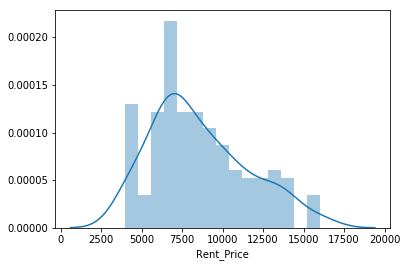

In [59]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)

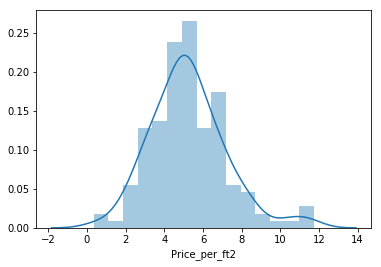

In [60]:
import seaborn as sns
sns.distplot(mh_rent['Price_per_ft2'],bins=15)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


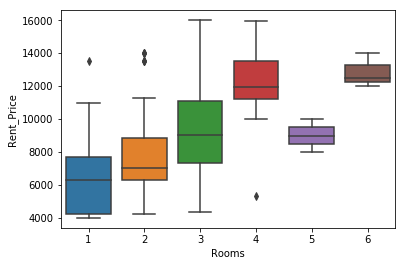

In [61]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mh_rent)

## Map of Manhattan apartments for rent
### The popups will indicate the address and the monthly price for rent thus making it convenient to select the target appartment with the price condition estipulated (max US7000 )

In [62]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ',  '+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    

map_manhattan_rent

## Map of Manhattan showing the places for rent and the cluster of venues
### Now, one can point to a rental place for price and address location information while knowing the cluster venues around it.
### This is an insightful way to explore rental possibilites

In [63]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_clusters2

## Now one can explore a particular rental place and its venues in detail
### In the map above, examination of appartments with rental place below 7000/month is straightforwad while knowing the venues around it.
### We could find an appartment with at the right price and in a location with desirable venues. The next step is to see if it is located near a subway metro station, in next cells work.

In [64]:

## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Roosevelt Island,Park,Coffee Shop,Sandwich Place,Indie Theater,Liquor Store,Greek Restaurant,Bus Stop,Baseball Field,Scenic Lookout,Restaurant
26,Morningside Heights,Bookstore,Coffee Shop,Park,American Restaurant,Food Truck,Deli / Bodega,Burger Joint,Tennis Court,Pub,Pharmacy
28,Battery Park City,Park,Coffee Shop,Hotel,Gym,Wine Shop,Italian Restaurant,Clothing Store,Plaza,Ice Cream Shop,Food Court
29,Financial District,Coffee Shop,Hotel,Wine Shop,Steakhouse,Gym,Pizza Place,Italian Restaurant,Café,Gym / Fitness Center,Bar


In [65]:
# from introduction I have scrapped the data using various links and downloaded the .csv file and using that to load the data frame
body = client_f430ded5cdc247608caefdcbb98c6dc8.get_object(Bucket='capstoneproj1-donotdelete-pr-hrcziebngjfanw',Key='mh_subway.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mh = pd.read_csv(body)
mh.head()



,sub_station,sub_address,lat,long,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509,NaN,NaN,NaN
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525,NaN,NaN,NaN
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156,NaN,NaN,NaN
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785,NaN,NaN,NaN
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525,NaN,NaN,NaN


In [88]:
    #  Add columns 'lat'  and 'long' to mh dataframe - with random temporary numbers to get started
sLength = len(mh['sub_station'])
lat = pd.Series(np.random.randn(sLength))
long=pd.Series(np.random.randn(sLength))
mh = mh.assign(lat=lat.values)
mh = mh.assign(long=long.values)

In [89]:
# from introduction I have scrapped the data using various links and downloaded the .csv file and using that to load the data frame
body = client_f430ded5cdc247608caefdcbb98c6dc8.get_object(Bucket='capstoneproj1-donotdelete-pr-hrcziebngjfanw',Key='mh_sub.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mhsub1 = pd.read_csv(body)
mhsub1.head()



,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


In [91]:
mhsub1.head(100)

,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525
5,Broadway-Lafayette St Station,"E Houston St, New York, 10012, United States",40.725684,-73.997726
6,28 Street Station,"New York, NY 10001, USA",40.730862,-73.987156
7,42 St - Bryant Pk,"New York, NY 10018, USA",40.730862,-73.987156
8,Bowery Station,"Bowery, New York, NY 10002, USA",40.720217,-73.993720
9,34th Street-Hudson,"380-394 11th Ave, New York, NY 10001, USA",40.753038,-74.003860


In [92]:
# map subway stations 
# create map of Manhattan using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude=40.7308619
longitude=-73.9871558

map_mhsub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mhsub1) 
map_mhsub1

### Map of Manhattan showing places for rent and the subway locations nearby
Now, we can visualize the desirable rental places and their nearest subway station. Popups display rental address and monthly rental price and the subway station name.
Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a rental place to an specific subway station

In [93]:
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long,Unnamed: 8
0,West 105th Street,Upper West Side,2.94,5,3400,10000,40.799771,-73.966213,NaN
1,East 97th Street,Upper East Side,3.57,3,2100,7500,40.788585,-73.955277,NaN
2,West 105th Street,Upper West Side,1.89,4,2800,5300,40.799771,-73.966213,NaN
3,CARMINE ST.,West Village,3.03,2,1650,5000,40.730523,-74.001873,NaN
4,171 W 23RD ST.,Chelsea,3.45,2,1450,5000,40.744118,-73.995299,NaN


In [94]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_manhattan_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_manhattan_rent

## 4.0 Results
### ONE CONSOLIDATE MAP
Let's consolidate all the required inforamtion to make the apartment selection in one map
Map of Manhattan with rental places, subway locations and cluster of venues
Red dots are Subway stations, Blue dots are apartments available for rent, Bubbles are the clusters of venues

In [95]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_one)

map_mh_one

## Problem Resolution
### The above consolidate map was used to explore options.
After examining, I have chosen two locations that meet the requirements which will assess to make a choice.
Apartment 1: 305 East 63rd Street in the Sutton Place Neighborhood and near 'subway 59th Street' station, Cluster # 2 Monthly rent : 7500 Dollars

Apartment 2: 19 Dutch Street in the Financial District Neighborhood and near 'Fulton Street Subway' station, Cluster # 3 Monthly rent : 6935 Dollars

## Venues for Apartment 1 - Cluster 2

In [96]:
## kk is the cluster number to explore
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Park,Bar,Playground,Gas Station,Baseball Field,German Restaurant,Harbor / Marina,Cocktail Bar,Coffee Shop,Pet Service


In [97]:
## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Roosevelt Island,Park,Coffee Shop,Sandwich Place,Indie Theater,Liquor Store,Greek Restaurant,Bus Stop,Baseball Field,Scenic Lookout,Restaurant
26,Morningside Heights,Bookstore,Coffee Shop,Park,American Restaurant,Food Truck,Deli / Bodega,Burger Joint,Tennis Court,Pub,Pharmacy
28,Battery Park City,Park,Coffee Shop,Hotel,Gym,Wine Shop,Italian Restaurant,Clothing Store,Plaza,Ice Cream Shop,Food Court
29,Financial District,Coffee Shop,Hotel,Wine Shop,Steakhouse,Gym,Pizza Place,Italian Restaurant,Café,Gym / Fitness Center,Bar


## Apartment Selection
Using the "one map" above, I was able to explore all possibilities since the popups provide the information needed for a good decision.
Apartment 1 rent cost is US7500 slightly above the US7000 budget. Apt 1 is located 400 meters from subway station at 59th Street and work place ( Park Ave and 53rd) is another 600 meters way. I can walk to work place and use subway for other places aroung. Venues for this apt are as of Cluster 2 and it is located in a fine district in the East side of Manhattan.

Apartment 2 rent cost is US6935, just under the US7000 budget. Apt 2 is located 60 meters from subway station at Fulton Street, but I will have to ride the subway daily to work , possibly 40-60 min ride. Venues for this apt are as of Cluster 3.

Based on current Singapore venues, I feel that Cluster 2 type of venues is a closer resemblance to my current place. That means that APARTMENT 1 is a better choice since the extra monthly rent is worth the conveniences it provides

## 5.0 DISCUSSION
In general, I am positively impressed with the overall organization, content and lab works presented during the Coursera IBM Certification Course
I feel this Capstone project presented me a great opportunity to practice and apply the Data Science tools and methodologies learned.
I have created a good project that I can present as an example to show my potential.
I feel I have acquired a good starting point to become a professional Data Scientist and I will continue exploring to creating examples of practical cases.

## 6.0 CONCLUSIONS
I feel rewarded with the efforts, time and money spent. I believe this course with all the topics covered is well worthy of appreciation.
This project has shown me a practical application to resolve a real situation that has impacting personal and financial impact using Data Science tools.
The mapping with Folium is a very powerful technique to consolidate information and make the analysis and decision thoroughly and with confidence. I would recommend for use in similar situations.
One must keep abreast of new tools for DS that continue to appear for application in several business fields.

# Project End

## Thank You